In [1]:
from terminal_optimization import objects
from terminal_optimization import defaults
from terminal_optimization import system

# 0. Prepare inputs

## 0.1 Generate demand forecast scenario

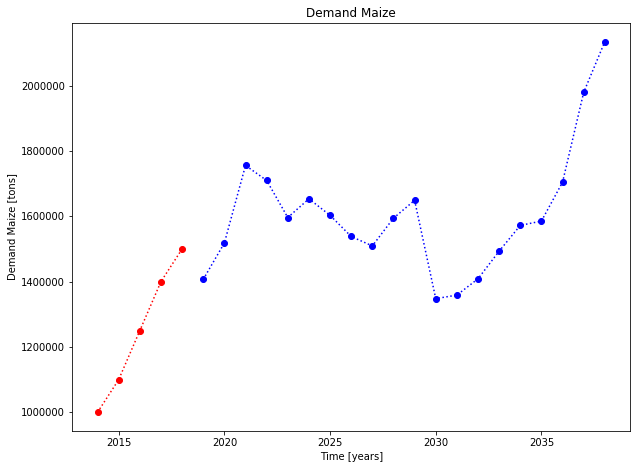

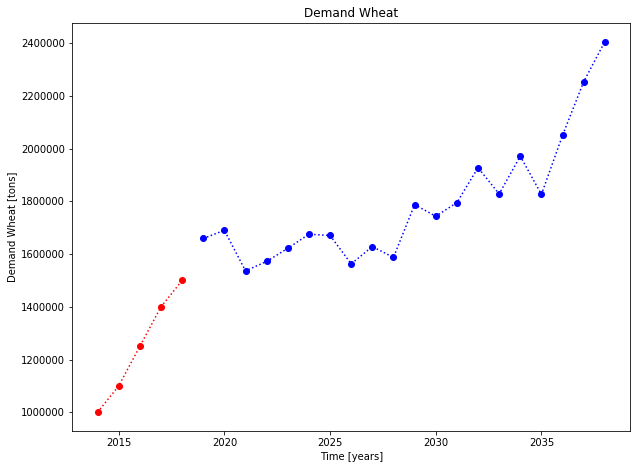

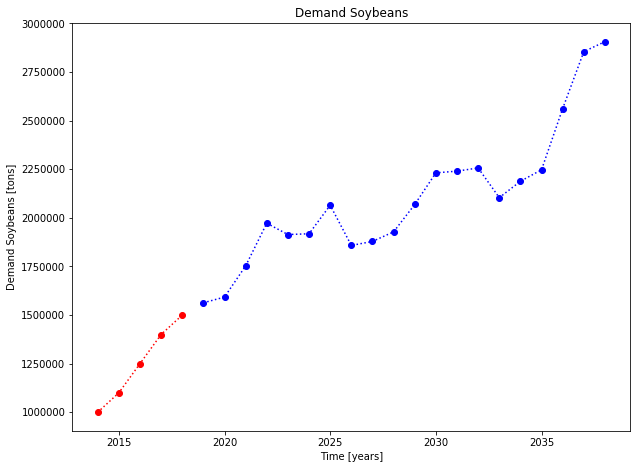

In [2]:
# instantiate a commodity object
maize = objects.Commodity(**defaults.maize_data)
wheat = objects.Commodity(**defaults.wheat_data)
soybeans = objects.Commodity(**defaults.soybean_data)

# create a future througput scenario
maize.scenario_random()
wheat.scenario_random()
soybeans.scenario_random()

demand = [maize, wheat, soybeans]

# plot scenarios 
if True:
    maize.plot_demand()
    wheat.plot_demand()
    soybeans.plot_demand()

## 0.2 Generate vessels

In [3]:
# instantiate vessels
handysize = objects.Vessel(**defaults.handysize_data)
handymax = objects.Vessel(**defaults.handymax_data)
panamax = objects.Vessel(**defaults.panamax_data)

vessels = [handysize, handymax, panamax]

# 1. Instatiate terminal system

In [4]:
# instantiate System object
Terminal = system.System(elements = demand + vessels)

# 2. Start simulation
Develop terminal given the throughput scenario and investment triggers implemented

In [5]:
Terminal.simulate()


Simulate year: 2019
  Total vessel calls: 99
     Handysize calls: 43
     Handymax calls: 30
     Panamax calls: 26
  Total cargo volume: 4629316
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned
     a total of 0 [] is online; 0 total planned

  Start analysis:
     Berth occupancy (@ start of year): inf
  *** add Berth to elements
     Berth occupancy (after adding berth): inf
  *** add Quay to elements
     Berth occupancy (after adding quay): inf
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 5.545456774555136
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 2.804459156508337
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 1.8907932838260706
  *** add Berth to elements
     Berth occupancy (after adding berth): 1.8907932838260706
  *** add Quay to elements
     Berth occupancy (after adding quay)

     Berth occupancy (after adding quay): 0.44778890912770686
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.4338260707113166
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.42093729678849473
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.40900324685995604
  *** add Berth to elements
     Berth occupancy (after adding berth): 0.40900324685995604
  *** add Quay to elements
     Berth occupancy (after adding quay): 0.40900324685995604
  *** add Harbour crane to elements
     Berth occupancy (after adding crane): 0.39792162906917006

Simulate year: 2038
  Total vessel calls: 162
     Handysize calls: 73
     Handymax calls: 51
     Panamax calls: 38
  Total cargo volume: 7447181
     a total of 10 Berth_01 is online; 10 total planned
     a total of 8 Quay_01 is online; 10 total planned
     a total of 24 Mobile_crane_01 is online; 28 total planned
     a total of 0 [] is online; 0 total p

## Report all elements

In [6]:
for element in Terminal.elements:
    print("")
    print(element.name)
    print("")
    print(element.__dict__)


Maize

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1406841
1   2020  1518214
2   2021  1755597
3   2022  1709666
4   2023  1596154
5   2024  1653455
6   2025  1602889
7   2026  1538106
8   2027  1509234
9   2028  1594220
10  2029  1648887
11  2030  1347882
12  2031  1358685
13  2032  1408669
14  2033  1493233
15  2034  1572079
16  2035  1585279
17  2036  1704419
18  2037  1979478
19  2038  2134636, 'handling_fee': 3, 'handysize_perc': 50, 'handymax_perc': 50, 'panamax_perc': 0, 'name': 'Maize', 'id': '9a21f3ec-4b27-11e9-96a9-60f677ba2ce0'}

Wheat

{'historic_data':    year   volume
0  2014  1000000
1  2015  1100000
2  2016  1250000
3  2017  1400000
4  2018  1500000, 'scenario_data':     year   volume
0   2019  1659317
1   2020  1690254
2   2021  1536373
3   2022  1572312
4   2023  1622016
5   2024  1675375
6   2025  1670579
7   2026  1563020
8   2027  1628442
9   2

19  2038        0.0    118536.25    38237.5  725400.0  180900.0}

Berth_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': [], 'energy': [], 'insurance': [], 'lease': [], 'demurrage': [], 'residual': [], 'capex': [], 'crane_type': 'Mobile cranes', 'max_cranes': 3, 'delivery_time': 1, 'year_purchase': [], 'year_online': 2020, 'name': 'Berth_01', 'id': '9aa7c578-4b27-11e9-b08b-60f677ba2ce0'}

Quay_01

{'triggers': [], 'renevue': [], 'labour': [], 'maintenance': 185627.2, 'energy': [], 'insurance': 185627.2, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 18562720, 'year_purchase': [], 'year_online': 2021, 'ownership': 'Port authority', 'delivery_time': 2, 'lifespan': 50, 'mobilisation_min': 2500000, 'mobilisation_perc': 0.02, 'maintenance_perc': 0.01, 'insurance_perc': 0.01, 'length': 400, 'depth': 14, 'freeboard': 4, 'Gijt_constant': 757.2, 'Gijt_coefficient': 1.2878, 'unit_rate': 65696, 'name': 'Quay_01', 'id': '9aa7c579-4b27-11e9-b931-60f677ba2ce0', 'df':     year

19  2038        0.0    118536.25    38237.5  725400.0  180900.0}

Mobile_crane_01

{'triggers': [], 'renevue': [], 'labour': 180900.0, 'maintenance': 118536.25, 'energy': 725400.0, 'insurance': 38237.5, 'lease': [], 'demurrage': [], 'residual': [], 'capex': 3823750, 'ownership': 'Terminal operator', 'delivery_time': 1, 'lifespan': 20, 'unit_rate': 3325000, 'mobilisation_perc': 0.15, 'maintenance_perc': 0.031, 'consumption': 310, 'insurance_perc': 0.01, 'crew': 3, 'crane_type': 'Mobile crane', 'lifting_capacity': 30, 'hourly_cycles': 25, 'eff_fact': 0.35, 'payload': 21, 'peak_capacity': 525, 'effective_capacity': 183, 'year_purchase': [], 'year_online': 2037, 'name': 'Mobile_crane_01', 'id': '9aca2098-4b27-11e9-a7ed-60f677ba2ce0', 'df':     year      capex  maintenance  insurance    energy    labour
0   2019        0.0         0.00        0.0       0.0       0.0
1   2020        0.0         0.00        0.0       0.0       0.0
2   2021        0.0         0.00        0.0       0.0       0.

In [7]:
cash_flows = Terminal.add_cashflow_elements()

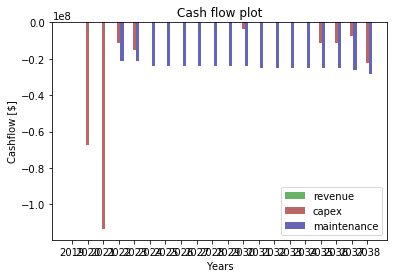

In [8]:
Terminal.cashflow_plot(cash_flows)

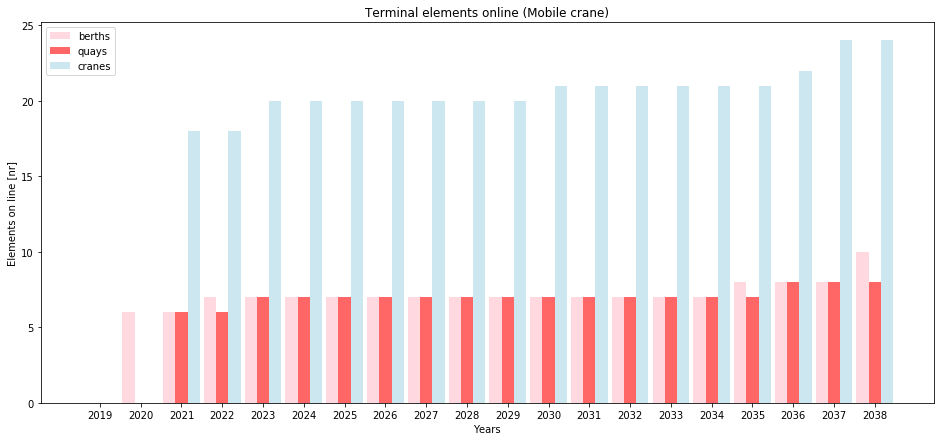

In [13]:
Terminal.terminal_elements_plot()

## Add a supply chain graph
The graph should be useable to detect if all elements of the supplychain are in place. 
Only when a path through the supply chain is available can revenue be obtained. 
This is still an experimental functionality and not yet fully implemented. 

In [ ]:
# *** specify supply chain logic
# 1. create object types
quay = objects.Quay_wall(**defaults.quay_wall_data)
berth = objects.Berth(**defaults.berth_data)
crane = objects.Cyclic_Unloader(**defaults.gantry_crane_data)
screw = objects.Continuous_Unloader(**defaults.continuous_screw_data)
conveyor1 = objects.Conveyor(**defaults.quay_conveyor_data)
storage = objects.Storage(**defaults.silo_data)
conveyor2 = objects.Conveyor(**defaults.hinterland_conveyor_data)
unloading_station = objects.Unloading_station(**defaults.hinterland_station_data)

# 2. specify nodes and edges
nodes = [quay, berth, crane, screw, conveyor1, storage, conveyor2, unloading_station]
edges = [[quay, berth],
         [berth, crane],
         [crane, screw],
         [screw, conveyor1],
         [conveyor1, storage],
         [storage, conveyor2],
         [conveyor2, unloading_station]]

# 3. invoke the supply_chain method
Terminal.supply_chain(nodes, edges)

In [ ]:
Terminal.plot_system()